In [ ]:
!pip install psycopg2-binary
!pip install ipython-sql
!pip install matplotlib
!pip install pandas

In [ ]:
%load_ext sql

from time import time
import configparser
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

In [ ]:
config = configparser.ConfigParser()
config.read_file(open('dwh.cfg'))

In [ ]:
DWH_ENDPOINT= config.get("CLUSTER","HOST")
DWH_DB= config.get("CLUSTER","DB_NAME")
DWH_DB_USER= config.get("CLUSTER","DB_USER")
DWH_DB_PASSWORD= config.get("CLUSTER","DB_PASSWORD")
DWH_PORT = config.get("CLUSTER","DB_PORT")

In [ ]:
conn_string="postgresql://{}:{}@{}:{}/{}".format(DWH_DB_USER, DWH_DB_PASSWORD, DWH_ENDPOINT, DWH_PORT,DWH_DB)

In [ ]:
%sql $conn_string

In [ ]:
%%sql SELECT
    DISTINCT
    userId as user_id,
    firstName as first_name,
    lastName as last_name,
    gender,
    last_value(level) over (
            partition by userId
            rows between unbounded preceding and unbounded following)
FROM staging_events WHERE userId is NOT NULL limit 10;

In [ ]:
conn = psycopg2.connect(conn_string)

query = ("""
    SELECT distinct u.last_name as "Last Name", u.first_name as "First Name", u.first_name + ' ' + u.last_name as Name, u.user_id, count(distinct(sp.songplay_id)) as "Number of songplays" FROM songplays sp JOIN users u using (user_id) group by u.user_id, u.last_name, u.first_name order by "Number of songplays" desc;
""")

df = pd.read_sql_query(query,conn)

df.head(10)

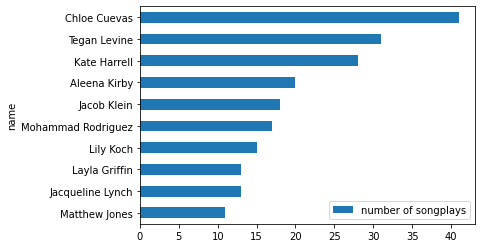

In [9]:
df.head(10).plot(kind='barh',x='name',y='number of songplays').invert_yaxis()
plt.show()